In [1]:
from visjobs.datas import get_data
data = get_data.pick_data( hour='06',latest=True,model='GFS', hourly=False)

from visjobs.visualize import draw_map

temp = data['tmpprs'][0:10:1,:,:].sel(lat = slice(36,40),lon=slice(26.5,27.5), lev=slice(1000,500)) - 273.15
rh = data['rhprs'][0:10:1,:,:].sel(lat = slice(36,40),lon=slice(26.5,27.5), lev=slice(1000,500))
time = len(data['time'][0:10:1])

lat_iso =temp.lat[:].values
height_iso = temp.lev[:].values

temp = temp.mean(dim='lon')
hum = rh.mean(dim='lon')


Temp_rh_cross | 1.map | Done--20:12:25.262381
Temp_rh_cross | 2.map | Done--20:12:26.444350
Temp_rh_cross | 3.map | Done--20:12:27.607547
TEMP_PRESS_TURKEY | TOTAL JOB DONE | Duration: 0:00:03.516070


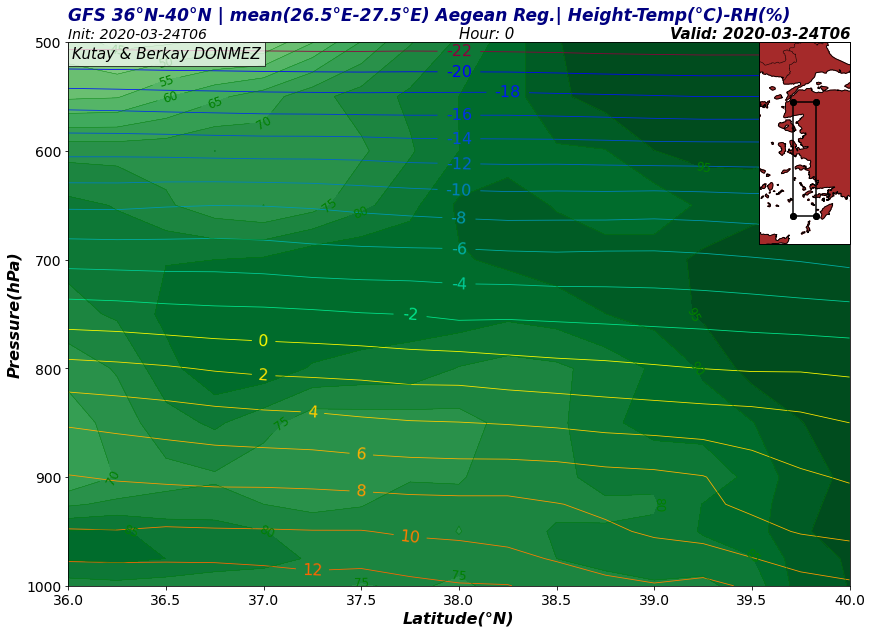

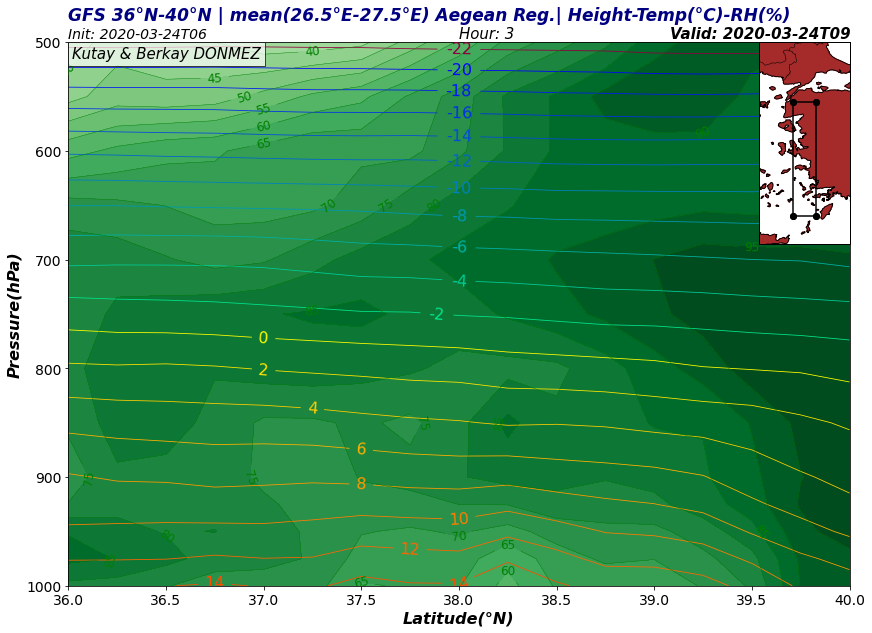

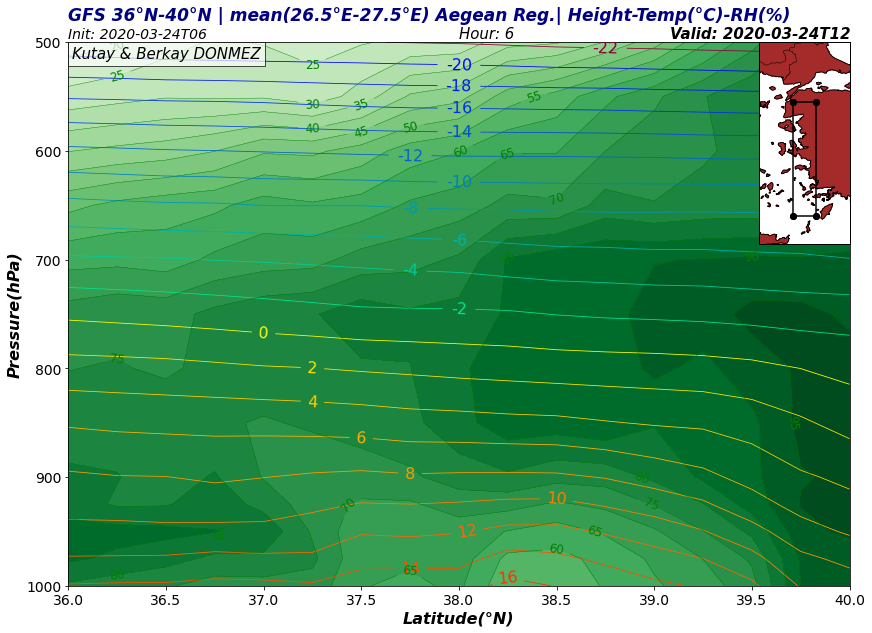

In [4]:
from pylab import rcParams
rcParams['figure.figsize'] = 30,26

draw_map.temp_rh_cross_aegean(time-7, temp, hum, height_iso, lat_iso, 
                          save_where=r'Pictures\temp_rh_cross_aegean{}.png', breaking=False)